In [1]:
# coding:utf-8

# 引入需要的包

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')


import warnings

def ignore_warn(*args ,**kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
train = pd.read_csv('C:/Users/zhuxx/PycharmProjects/tianchi_yiliao/data/d_train_20180102.csv',encoding='gbk')
test = pd.read_csv('C:/Users/zhuxx/PycharmProjects/tianchi_yiliao/data/d_test_A_20180102.csv',encoding='gbk')

print('train shape',train.shape)
print('test shape',test.shape)

train shape (5642, 42)
test shape (1000, 41)


In [3]:
# 查看特征列
print(train.columns)

Index(['id', '性别', '年龄', '体检日期', '*天门冬氨酸氨基转换酶', '*丙氨酸氨基转换酶', '*碱性磷酸酶',
       '*r-谷氨酰基转换酶', '*总蛋白', '白蛋白', '*球蛋白', '白球比例', '甘油三酯', '总胆固醇',
       '高密度脂蛋白胆固醇', '低密度脂蛋白胆固醇', '尿素', '肌酐', '尿酸', '乙肝表面抗原', '乙肝表面抗体', '乙肝e抗原',
       '乙肝e抗体', '乙肝核心抗体', '白细胞计数', '红细胞计数', '血红蛋白', '红细胞压积', '红细胞平均体积',
       '红细胞平均血红蛋白量', '红细胞平均血红蛋白浓度', '红细胞体积分布宽度', '血小板计数', '血小板平均体积',
       '血小板体积分布宽度', '血小板比积', '中性粒细胞%', '淋巴细胞%', '单核细胞%', '嗜酸细胞%', '嗜碱细胞%',
       '血糖'],
      dtype='object')


In [4]:
# 查看数据
print(train.head())
print(test.head())

   id 性别  年龄        体检日期  *天门冬氨酸氨基转换酶  *丙氨酸氨基转换酶  *碱性磷酸酶  *r-谷氨酰基转换酶   *总蛋白  \
0   1  男  41  12/10/2017       24.960     23.100  99.590      20.230 76.880   
1   2  男  41  19/10/2017       24.570     36.250  67.210      79.000 79.430   
2   3  男  46  26/10/2017       20.820     15.230  63.690      38.170 86.230   
3   4  女  22  25/10/2017       14.990     10.590  74.080      20.220 70.980   
4   5  女  48  26/10/2017       20.070     14.780  75.790      22.720 78.050   

     白蛋白  ...    血小板计数  血小板平均体积  血小板体积分布宽度  血小板比积  中性粒细胞%  淋巴细胞%  单核细胞%  \
0 49.600  ...  166.000    9.900     17.400  0.164  54.100 34.200  6.500   
1 47.760  ...  277.000    9.200     10.300  0.260  52.000 36.700  5.800   
2 48.000  ...  241.000    8.300     16.600  0.199  48.100 40.300  7.700   
3 44.020  ...  252.000   10.300     10.800  0.260  41.700 46.500  6.700   
4 41.830  ...  316.000   11.100     14.000  0.350  56.600 33.100  9.100   

   嗜酸细胞%  嗜碱细胞%    血糖  
0  4.700  0.600 6.060  
1  4.700  0.800 5.390  
2 

In [5]:
# 查看缺失值比例
data = pd.concat([train,test],axis=0)
print(data)
print(data.isnull().sum()/len(data))

     *r-谷氨酰基转换酶  *丙氨酸氨基转换酶  *天门冬氨酸氨基转换酶   *总蛋白   *球蛋白  *碱性磷酸酶    id  中性粒细胞%  \
0        20.230     23.100       24.960 76.880 27.280  99.590     1  54.100   
1        79.000     36.250       24.570 79.430 31.670  67.210     2  52.000   
2        38.170     15.230       20.820 86.230 38.230  63.690     3  48.100   
3        20.220     10.590       14.990 70.980 26.960  74.080     4  41.700   
4        22.720     14.780       20.070 78.050 36.220  75.790     5  56.600   
5        23.350     22.590       23.720 76.460 30.610  81.230     6  42.900   
6        65.420     25.530       24.970 80.820 34.420 109.030     7  52.900   
7        25.150     40.030       37.320 74.170 32.540  88.490     8  52.800   
8        67.090     39.170       21.700 76.120 26.810 102.910     9  53.100   
9        25.750     15.790       18.890 75.940 29.300  78.210    10  65.600   
10       84.970     35.760       27.330 75.840 32.130  80.260    11  54.000   
11       48.160     28.460       22.890 73.800 25.48

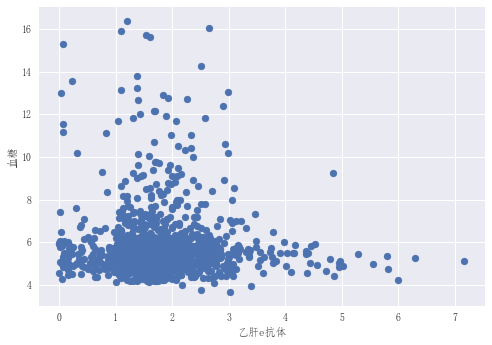

In [6]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
train['乙肝e抗体'] = train['乙肝e抗体'].dropna()
fig ,ax = plt.subplots()
ax.scatter(x = train['乙肝e抗体'],y=train['血糖'])
plt.ylabel('血糖')
plt.xlabel('乙肝e抗体')


 mu = 5.63 and sigma = 1.54



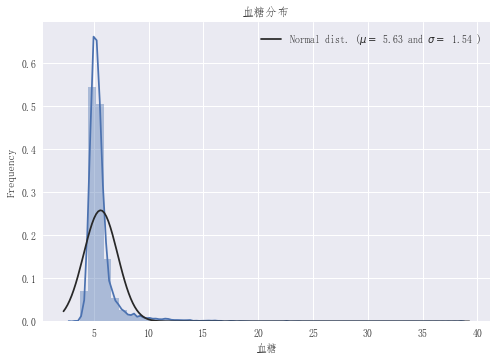

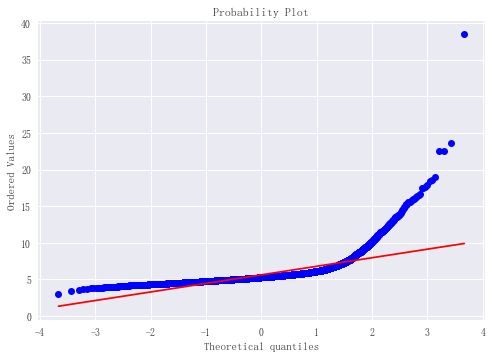

In [7]:
# 血糖 is the variable we need to predict. So let's do some analysis on this variable first.

sns.distplot(train['血糖'],fit=norm)

(mu,sigma) = norm.fit(train['血糖'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('血糖分布')

fig = plt.figure()
res = stats.probplot(train['血糖'], plot=plt)
plt.show()

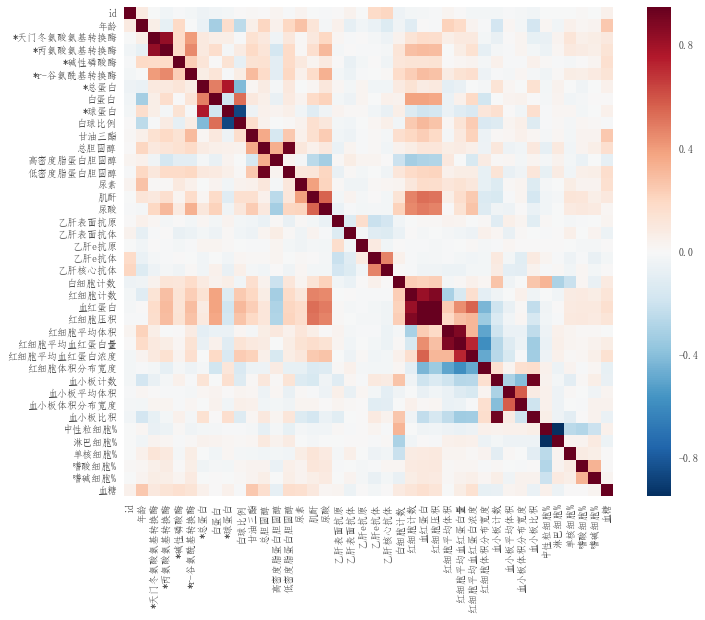

In [8]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9,square=True)